In [1]:
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 36})
rc('text', usetex=True)

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import functools
import math

plt.rcParams.update({'font.size': 45})

def f(x):
    x1, x2 = x
    return 0.02*x1*x1 + 0.005*x2*x2

def L2(x):
    x1, x2 = x
    return math.sqrt(x1*x1 + x2*x2)

def grad1(x1):
    return 0.04*x1

def grad2(x2):
    return 0.01*x2

def grad(x):
    x1, x2 = x
    grad = np.array([0.04*x1, 0.01*x2])
    return grad

def hessian(x):
    hessian = np.array([[0.04, 0], [0, 0.01]])
    return hessian

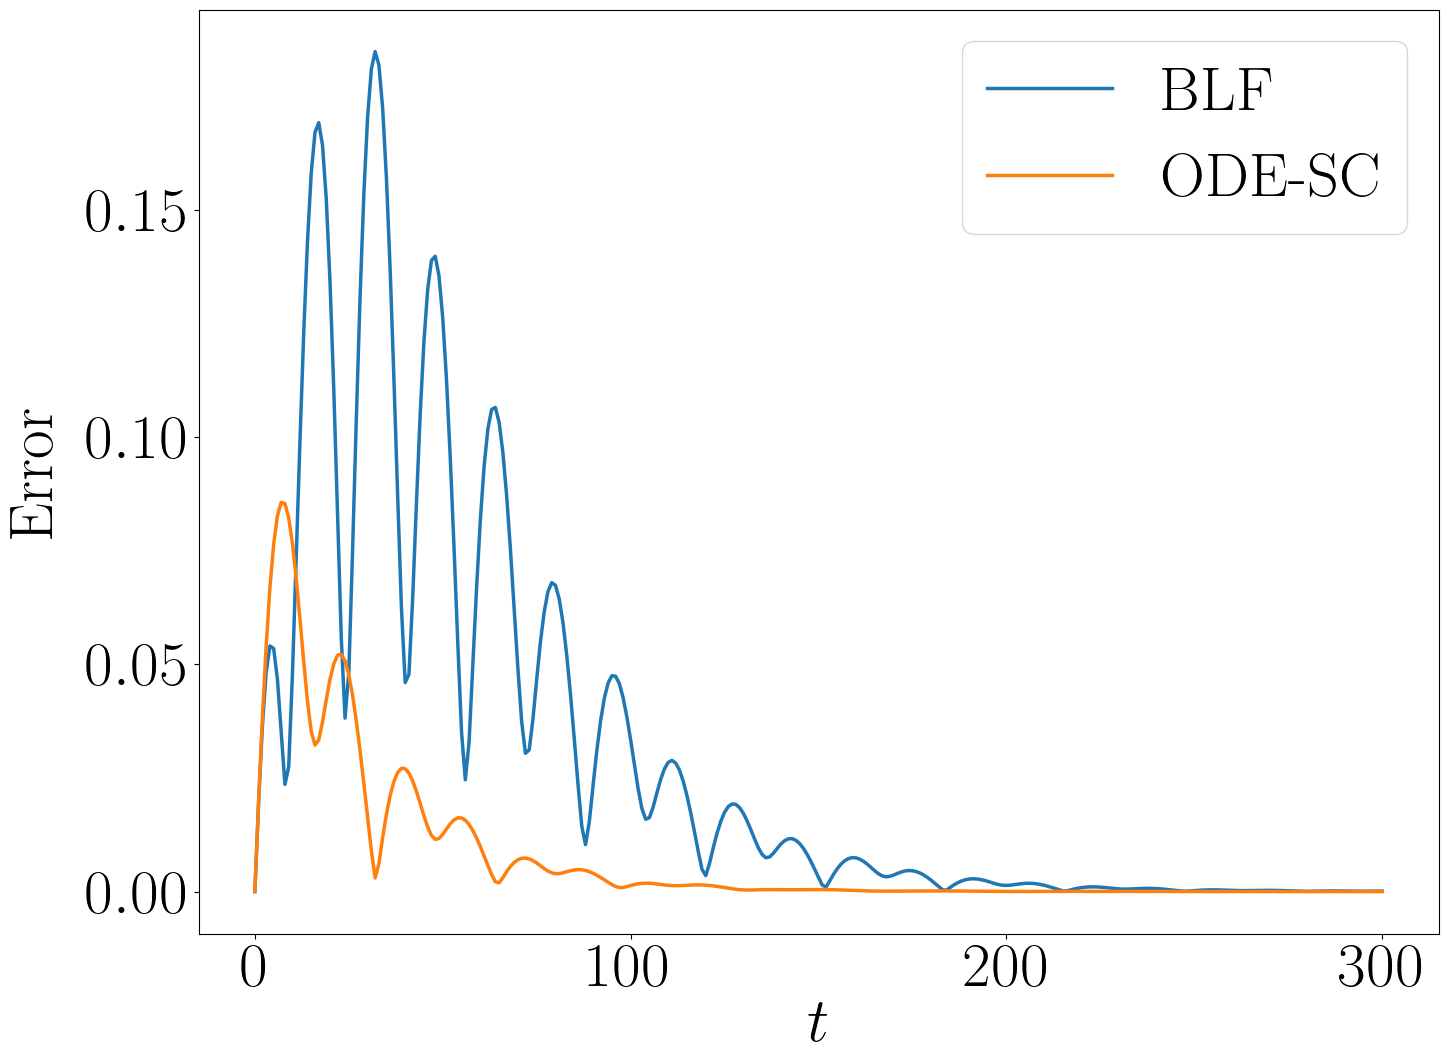

In [2]:
C = 1

# Discretization interval
h = 1/C

# Range of time
time = int(300)
discrete_time = int(time*C)

dpi=100

# Coefficients
mu = 0.001
sqmu= math.sqrt(mu)
A = math.exp(sqmu*h)
s = (1-1/A)*(1-1/A)/mu
a = (A-1)/(2*A-1)
b = 1/(2*A-1)

# start point
p0 = [1,1,0,0]

t = np.linspace(0, time, time+1)
t2 = np.linspace(0, time, time*100+1)
discrete_t = np.linspace(0, time, discrete_time+1)

#Calculate Nesterov's method (NAG-SC)
def Nesterov(time):
    Nes = np.zeros((time+1,2))
    Nes[0] = [1, 1]
    for k in range(time):
        if k==0:
            y = Nes[k]
        else:
            y = Nes[k] + (Nes[k]-Nes[k-1])* b
        Nes[k+1] = y -  s * grad(y)
    return Nes

# ODE from Wilson et al.
def BLF_SC(p,t):
    x1, x2, dx1, dx2 = p
    dpdt = [dx1, dx2, -(2-a)*sqmu*dx1-grad1(x1) , -(2-a)*sqmu*dx2-grad2(x2)]
    return dpdt

# ODE-SC
def ODE_SC(p,t):
    x1, x2, dx1, dx2 = p
    dpdt = [dx1, dx2, -(2-a)*sqmu*dx1-grad1(x1+a*dx1/sqmu) , -(2-a)*sqmu*dx2-grad2(x2+a*dx2/sqmu)]
    return dpdt

Nes = Nesterov(time=discrete_time)
sol = odeint(BLF_SC, p0, t2)
sol2 = odeint(ODE_SC, p0, t2)

solh = sol[:,:2][np.arange(0,len(sol[:,:2]),int(100/C))]
sol2h = sol2[:,:2][np.arange(0,len(sol2[:,:2]),int(100/C))]

L2_BLF_Nes = np.apply_along_axis(L2, 1, solh[:,:2]-Nes)
L2_ODE_Nes = np.apply_along_axis(L2, 1, sol2h[:,:2]-Nes)

plt.rcParams.update({'font.size': 45})
plt.figure(figsize=(16,12))
plt.plot(discrete_t, L2_BLF_Nes[:], label='BLF', linewidth=2.5)
plt.plot(discrete_t, L2_ODE_Nes[:], label='ODE-SC', linewidth=2.5)

plt.xlabel('$t$', labelpad=0)
plt.ylabel('Error', labelpad=15)
plt.legend()
plt.savefig('L2_BLF_ODE_SC_1.png', dpi=dpi, bbox_inches = 'tight', pad_inches = 0)
plt.show()

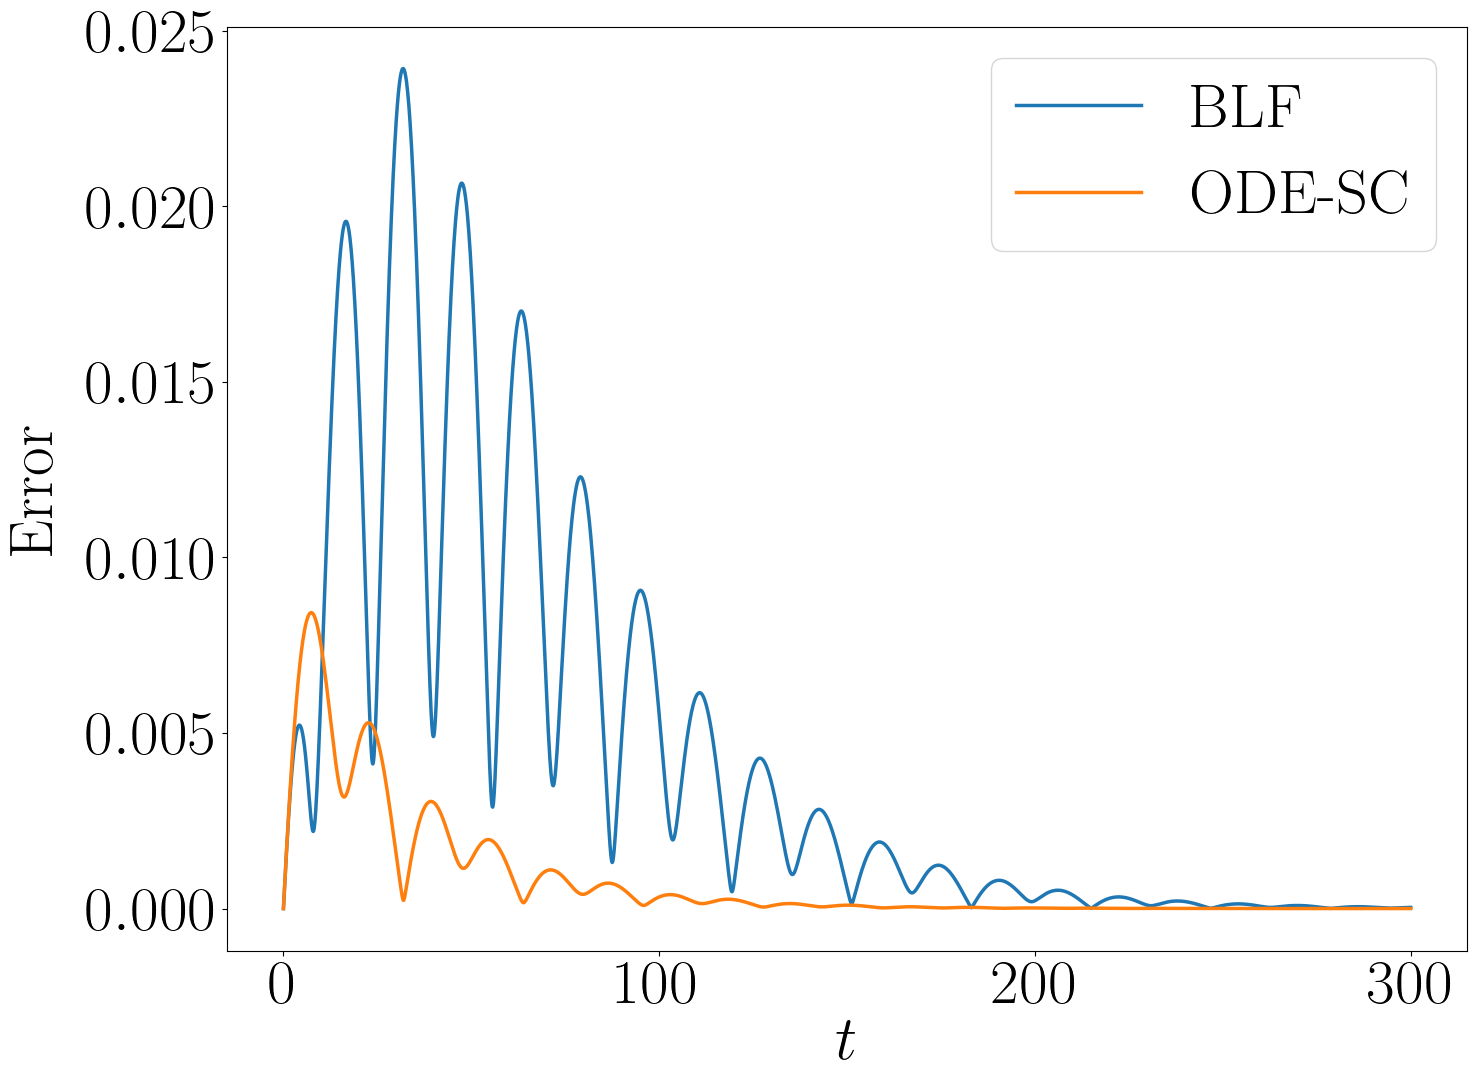

In [3]:
C = 10

# Discretization interval
h = 1/C

# Range of time
time = int(300)
discrete_time = int(time*C)

dpi=100

# Coefficients
mu = 0.001
sqmu= math.sqrt(mu)
A = math.exp(sqmu*h)
s = (1-1/A)*(1-1/A)/mu
a = (A-1)/(2*A-1)
b = 1/(2*A-1)

# start point
p0 = [1,1,0,0]

t = np.linspace(0, time, time+1)
t2 = np.linspace(0, time, time*100+1)
discrete_t = np.linspace(0, time, discrete_time+1)

#Calculate Nesterov's method (NAG-SC)
def Nesterov(time):
    Nes = np.zeros((time+1,2))
    Nes[0] = [1, 1]
    for k in range(time):
        if k==0:
            y = Nes[k]
        else:
            y = Nes[k] + (Nes[k]-Nes[k-1])* b
        Nes[k+1] = y -  s * grad(y)
    return Nes

# ODE from Wilson et al.
def BLF_SC(p,t):
    x1, x2, dx1, dx2 = p
    dpdt = [dx1, dx2, -(2-a)*sqmu*dx1-grad1(x1) , -(2-a)*sqmu*dx2-grad2(x2)]
    return dpdt

# ODE-SC
def ODE_SC(p,t):
    x1, x2, dx1, dx2 = p
    dpdt = [dx1, dx2, -(2-a)*sqmu*dx1-grad1(x1+a*dx1/sqmu) , -(2-a)*sqmu*dx2-grad2(x2+a*dx2/sqmu)]
    return dpdt

Nes = Nesterov(time=discrete_time)
sol = odeint(BLF_SC, p0, t2)
sol2 = odeint(ODE_SC, p0, t2)

solh = sol[:,:2][np.arange(0,len(sol[:,:2]),int(100/C))]
sol2h = sol2[:,:2][np.arange(0,len(sol2[:,:2]),int(100/C))]

L2_BLF_Nes = np.apply_along_axis(L2, 1, solh[:,:2]-Nes)
L2_ODE_Nes = np.apply_along_axis(L2, 1, sol2h[:,:2]-Nes)

plt.rcParams.update({'font.size': 45})
plt.figure(figsize=(16,12))
plt.plot(discrete_t, L2_BLF_Nes[:], label='BLF', linewidth=2.5)
plt.plot(discrete_t, L2_ODE_Nes[:], label='ODE-SC', linewidth=2.5)

plt.xlabel('$t$', labelpad=0)
plt.ylabel('Error', labelpad=15)
plt.legend()
plt.savefig('L2_BLF_ODE_SC_2.png', dpi=dpi, bbox_inches = 'tight', pad_inches = 0)
plt.show()

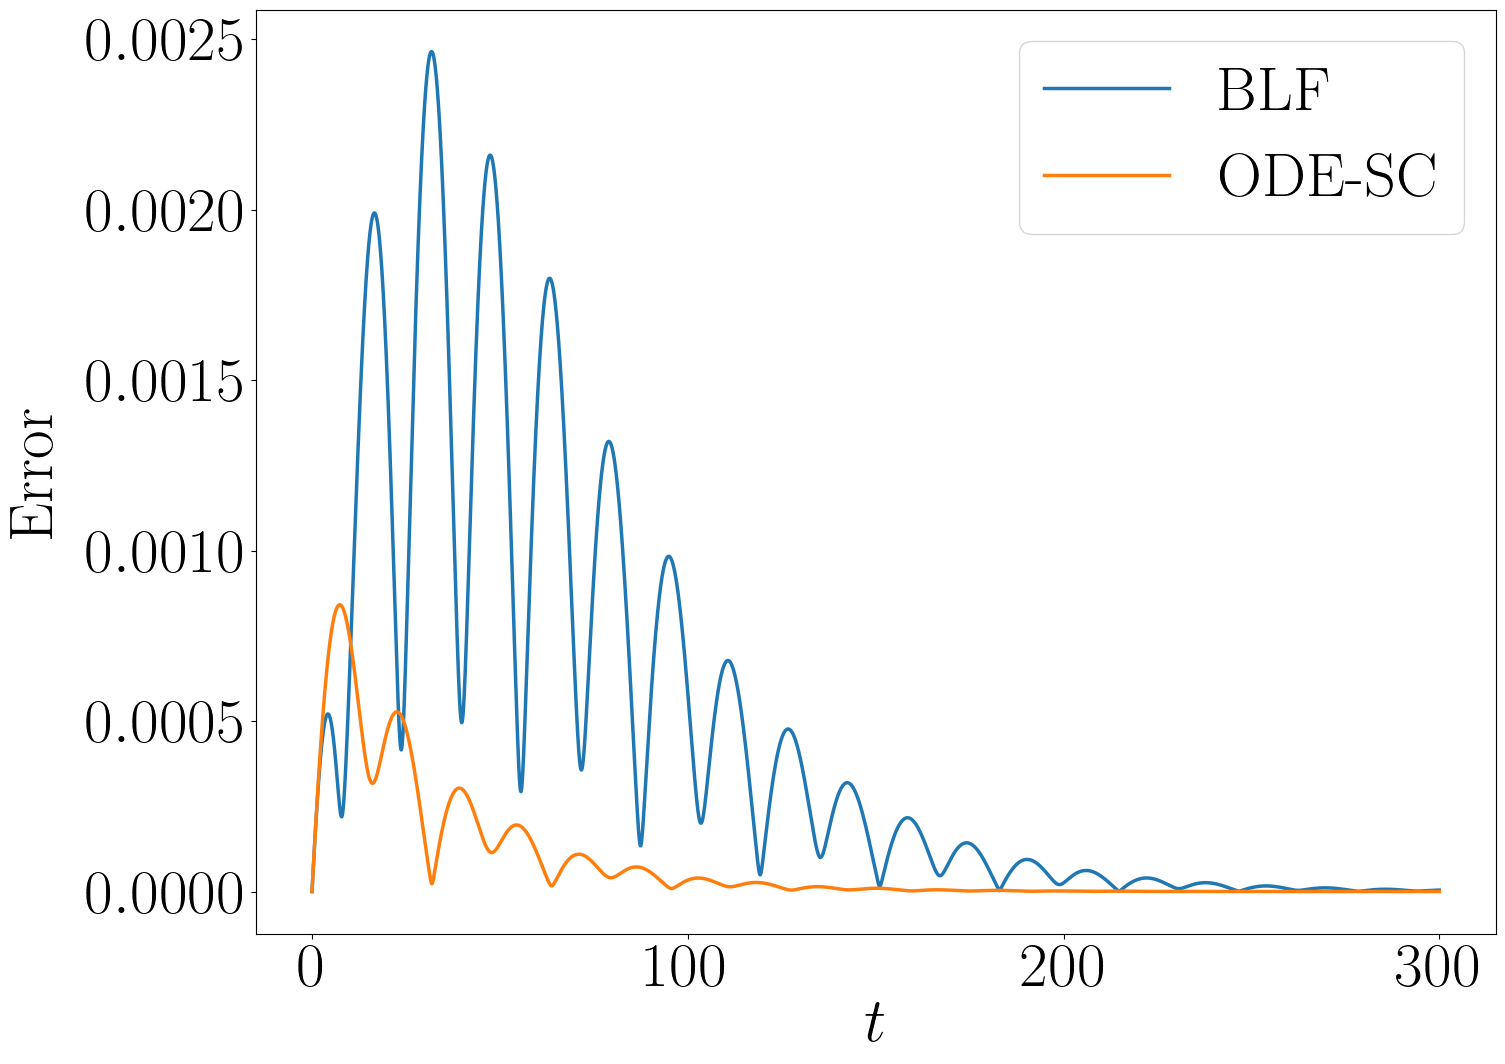

In [4]:
C = 100

# Discretization interval
h = 1/C

# Range of time
time = int(300)
discrete_time = int(time*C)

dpi=100

# Coefficients
mu = 0.001
sqmu= math.sqrt(mu)
A = math.exp(sqmu*h)
s = (1-1/A)*(1-1/A)/mu
a = (A-1)/(2*A-1)
b = 1/(2*A-1)

# start point
p0 = [1,1,0,0]

t = np.linspace(0, time, time+1)
t2 = np.linspace(0, time, time*100+1)
discrete_t = np.linspace(0, time, discrete_time+1)

#Calculate Nesterov's method (NAG-SC)
def Nesterov(time):
    Nes = np.zeros((time+1,2))
    Nes[0] = [1, 1]
    for k in range(time):
        if k==0:
            y = Nes[k]
        else:
            y = Nes[k] + (Nes[k]-Nes[k-1])* b
        Nes[k+1] = y -  s * grad(y)
    return Nes

# ODE from Wilson et al.
def BLF_SC(p,t):
    x1, x2, dx1, dx2 = p
    dpdt = [dx1, dx2, -(2-a)*sqmu*dx1-grad1(x1) , -(2-a)*sqmu*dx2-grad2(x2)]
    return dpdt

# ODE-SC
def ODE_SC(p,t):
    x1, x2, dx1, dx2 = p
    dpdt = [dx1, dx2, -(2-a)*sqmu*dx1-grad1(x1+a*dx1/sqmu) , -(2-a)*sqmu*dx2-grad2(x2+a*dx2/sqmu)]
    return dpdt

Nes = Nesterov(time=discrete_time)
sol = odeint(BLF_SC, p0, t2)
sol2 = odeint(ODE_SC, p0, t2)

solh = sol[:,:2][np.arange(0,len(sol[:,:2]),int(100/C))]
sol2h = sol2[:,:2][np.arange(0,len(sol2[:,:2]),int(100/C))]

L2_BLF_Nes = np.apply_along_axis(L2, 1, solh[:,:2]-Nes)
L2_ODE_Nes = np.apply_along_axis(L2, 1, sol2h[:,:2]-Nes)

plt.rcParams.update({'font.size': 45})
plt.figure(figsize=(16,12))
plt.plot(discrete_t, L2_BLF_Nes[:], label='BLF', linewidth=2.5)
plt.plot(discrete_t, L2_ODE_Nes[:], label='ODE-SC', linewidth=2.5)

plt.xlabel('$t$', labelpad=0)
plt.ylabel('Error', labelpad=15)
plt.legend()
plt.savefig('L2_BLF_ODE_SC_3.png', dpi=dpi, bbox_inches = 'tight', pad_inches = 0)
plt.show()